# 1. Data visualisation

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120
from scipy.optimize import minimize

# raw

In [2]:
df = pd.read_csv('data/raw/ELIA.csv', sep=';', on_bad_lines='skip')
df.head()

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2025-12-01T23:45:00+01:00,PT15M,Onshore,Flanders,Dso,1580.94,1413.1,1378.5,1433.1,1333.6,...,1369.9,1382.9,1328.4,1414.2,111.8,58.4,145.1,1700.58,0.93,''
1,2025-12-01T23:45:00+01:00,PT15M,Onshore,Flanders,Elia,220.23,178.0,144.0,197.9,174.6,...,203.3,176.2,123.6,205.8,132.0,75.1,162.0,333.40,0.66,''
2,2025-12-01T23:45:00+01:00,PT15M,Onshore,Wallonia,Dso,965.72,972.1,807.6,1066.4,923.8,...,1044.6,933.1,755.1,1043.4,340.9,115.0,417.4,1353.77,0.71,''
3,2025-12-01T23:45:00+01:00,PT15M,Offshore,Federal,Elia,2185.50,2171.9,2136.8,2242.7,2174.5,...,2255.6,2173.5,2076.5,2253.2,2121.7,425.4,2150.4,2262.10,0.97,''
4,2025-12-01T23:45:00+01:00,PT15M,Onshore,Wallonia,Elia,118.47,115.8,99.6,136.3,109.8,...,144.0,108.7,84.1,139.6,72.3,31.4,79.0,188.20,0.63,''


In [3]:
df = pd.read_csv('data/raw/MTO_BELGIQUE_18_to_25.csv')
df.head()

,valid_time,u100,v100,u10,v10,t2m,msl,sst,sp,latitude,longitude
0,2018-01-01 00:00:00,17.891388,12.289810,13.044540,9.531647,281.30188,99547.310,280.7588,99568.836,51.5,3.0
1,2018-01-01 01:00:00,19.008880,7.765930,14.131149,6.141098,281.37300,99638.310,280.7588,99659.280,51.5,3.0
2,2018-01-01 02:00:00,17.849350,5.749756,13.414413,4.661072,281.32764,99812.190,280.7588,99833.780,51.5,3.0
3,2018-01-01 03:00:00,16.603897,4.897415,12.725754,3.991196,281.15686,99922.060,280.7588,99943.300,51.5,3.0
4,2018-01-01 04:00:00,14.488632,5.378235,11.158417,4.428650,280.96695,99985.375,280.7588,100007.720,51.5,3.0


# output1

In [4]:
df = pd.read_csv('data/output1/experts.csv')
df.head()

,Date_Heure,y_true,ridge,lgbm,elasticnet
0,2025-08-31 16:00:00,862.46,451.309817,439.013798,281.336867
1,2025-08-31 17:00:00,429.70,583.965529,592.248622,872.138830
2,2025-08-31 18:00:00,373.39,411.045584,425.064542,402.313971
3,2025-08-31 19:00:00,209.01,247.129481,238.841229,300.716344
4,2025-08-31 20:00:00,177.53,142.040569,116.453118,175.932581


In [5]:
df = pd.read_csv('data/output1/experts_100.csv')
df.head()

,Date_Heure,y_true,ridge,lgbm,elasticnet
0,2025-11-18 20:00:00,1340.16,1536.000665,1458.511285,1512.054381
1,2025-11-18 21:00:00,1049.36,1244.513585,1093.529079,1237.614023
2,2025-11-18 22:00:00,834.63,972.097477,842.602783,971.990342
3,2025-11-18 23:00:00,1268.41,806.199811,720.938078,799.068464
4,2025-11-19 00:00:00,1184.98,1240.974499,1115.347317,1237.698183


In [6]:
df = pd.read_csv('data/output1/experts_metrics.csv')
df.head()

,Unnamed: 0,MAE,RMSE,MAPE (%),R2
0,ridge,275.676828,349.758985,inf,0.807623
1,lgbm,170.061604,240.883203,inf,0.908751
2,elasticnet,109.248233,175.040449,inf,0.951817


In [7]:
df = pd.read_csv('data/output1/experts_metrics_100.csv')
df.head()

,Unnamed: 0,MAE,RMSE,MAPE (%),R2
0,ridge,207.963813,323.603001,inf,0.807369
1,lgbm,185.970696,308.291841,inf,0.825166
2,elasticnet,207.400620,324.284351,inf,0.806557


# output2

In [8]:
df = pd.read_csv('data/output2/pred_24h.csv')
df.head(24)

,Date_Heure,y_true,ridge,lgbm,elasticnet
0,2025-11-23 00:00:00,2174.19,1683.271865,1910.774853,2134.502263
1,2025-11-23 01:00:00,2171.31,1711.088602,2012.926059,2148.468313
2,2025-11-23 02:00:00,2172.17,1739.825364,2001.137703,2147.413565
3,2025-11-23 03:00:00,2175.08,1701.295251,1990.377191,2121.722180
4,2025-11-23 04:00:00,2172.28,1690.746082,1980.829250,2131.703344
5,2025-11-23 05:00:00,2172.06,1690.214182,2063.609239,2142.219754
6,2025-11-23 06:00:00,2176.97,1685.172293,2057.663061,2137.029479
7,2025-11-23 07:00:00,2178.34,1693.003588,2017.314682,2148.506301
8,2025-11-23 08:00:00,2175.95,1703.761253,2048.535642,2179.703852
9,2025-11-23 09:00:00,2170.76,1727.162671,2008.230624,2198.078102


# 2. Test Opera

In [20]:
import pandas as pd
import numpy as np

from src.opera.mixture import Mixture  # adapte si besoin

# --- Load train (experts.csv) ---
df_train = pd.read_csv("data/output1/experts.csv")
df_train["Date_Heure"] = pd.to_datetime(df_train["Date_Heure"])
cols = ["y_true","ridge","lgbm","elasticnet"]
for c in cols:
    df_train[c] = pd.to_numeric(df_train[c], errors="coerce")
df_train = df_train.dropna(subset=cols)

y_train = df_train["y_true"]
X_train = df_train[["ridge","lgbm","elasticnet"]]
awake_train = np.ones(X_train.shape)

# --- Fit mixture on all history up to 2025-11-22 23:00 ---
mod = Mixture(
    y=y_train,
    experts=X_train,
    awake=awake_train,
    model="FTRL",
    loss_type="mse",
    loss_gradient=True,
    parameters={
        "constraints": [{"type": "eq", "fun": lambda w: np.sum(w) - 1}],
        "options": {"maxiter": 50},
    }
)


print("Last timestamp train:", df_train["Date_Heure"].iloc[-1])
print("Last weights:", mod.w, "sum=", mod.w.sum())

# --- Load day-ahead block (pred_24h.csv) ---
df_24 = pd.read_csv("data/output2/pred_24h.csv")
df_24["Date_Heure"] = pd.to_datetime(df_24["Date_Heure"])
for c in cols:
    df_24[c] = pd.to_numeric(df_24[c], errors="coerce")
df_24 = df_24.dropna(subset=cols)

X_24 = df_24[["ridge","lgbm","elasticnet"]]
y_24 = df_24["y_true"].to_numpy()

print("First timestamp 24h:", df_24["Date_Heure"].iloc[0])
print("Last  timestamp 24h:", df_24["Date_Heure"].iloc[-1])

# --- Predict 24h with frozen weights (no update) ---
y_hat_24 = mod.predict(X_24).reshape(-1)

df_out = df_24[["Date_Heure", "y_true", "ridge", "lgbm", "elasticnet"]].copy()
df_out["moe"] = y_hat_24
df_out.to_csv("data/output2/moe_24h.csv", index=False)

print("Saved:", "data/output2/moe_24h.csv")
df_out.head()


rmse = np.sqrt(np.mean((y_hat_24 - y_24)**2))
mae  = np.mean(np.abs(y_hat_24 - y_24))
print("RMSE 24h:", rmse)
print("MAE  24h:", mae)

Last timestamp train: 2025-11-22 23:00:00
Last weights: [0.06263692 0.22747568 0.7098874 ] sum= 1.0
First timestamp 24h: 2025-11-23 00:00:00
Last  timestamp 24h: 2025-11-23 23:00:00
Saved: data/output2/moe_24h.csv
RMSE 24h: 122.90150179300308
MAE  24h: 108.07742461585035


In [21]:
def rmse(y, yhat): 
    return np.sqrt(np.mean((yhat - y)**2))

def mae(y, yhat):
    return np.mean(np.abs(yhat - y))

y = df_out["y_true"].to_numpy()

scores = {}
for name in ["ridge", "lgbm", "elasticnet", "moe"]:
    scores[name] = {"RMSE": rmse(y, df_out[name].to_numpy()),
                    "MAE":  mae(y, df_out[name].to_numpy())}

df_out["uniform"] = df_out[["ridge","lgbm","elasticnet"]].mean(axis=1).to_numpy()
scores["uniform"] = {"RMSE": rmse(y, df_out["uniform"].to_numpy()),
                     "MAE":  mae(y, df_out["uniform"].to_numpy())}

pd.DataFrame(scores).T.sort_values("RMSE")


,RMSE,MAE
elasticnet,82.353598,56.461518
moe,122.901502,108.077425
uniform,265.622848,250.231226
lgbm,268.382277,239.581753
ridge,509.108994,497.407327


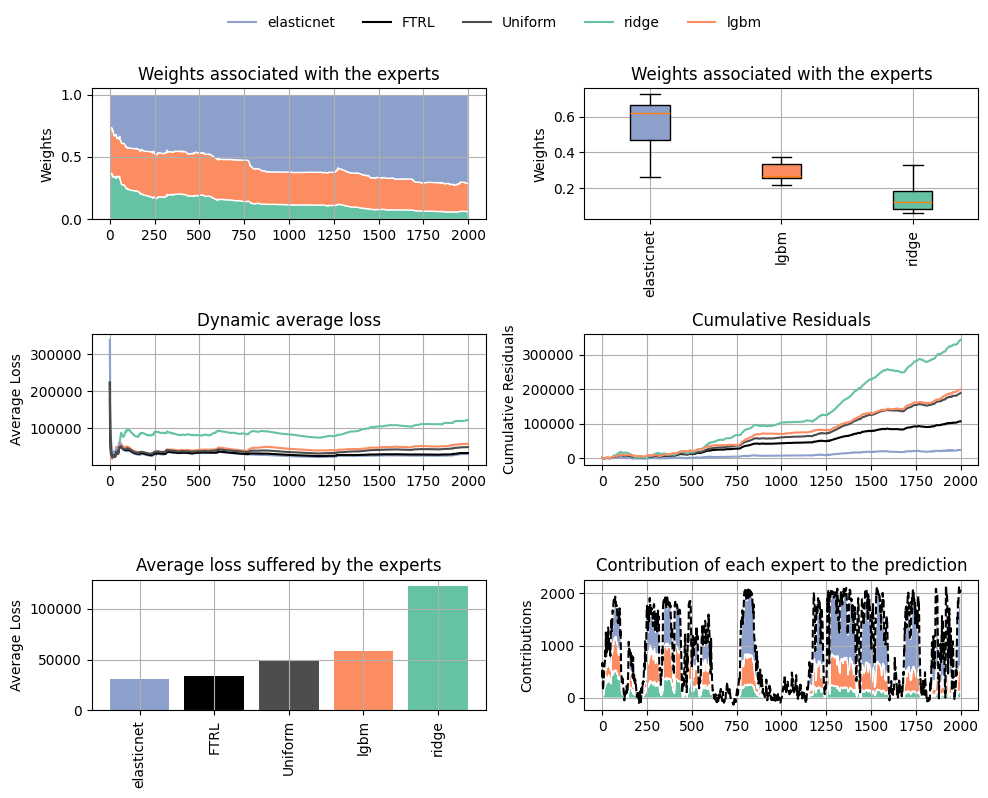

In [22]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

K = X_train.shape[1]
colors = sns.color_palette("Set2", K + 2)  # +2 car OPERA ajoute "model" + "Uniform" dans certaines vues

mod.plot_mixture(plot_type="all", colors=colors)


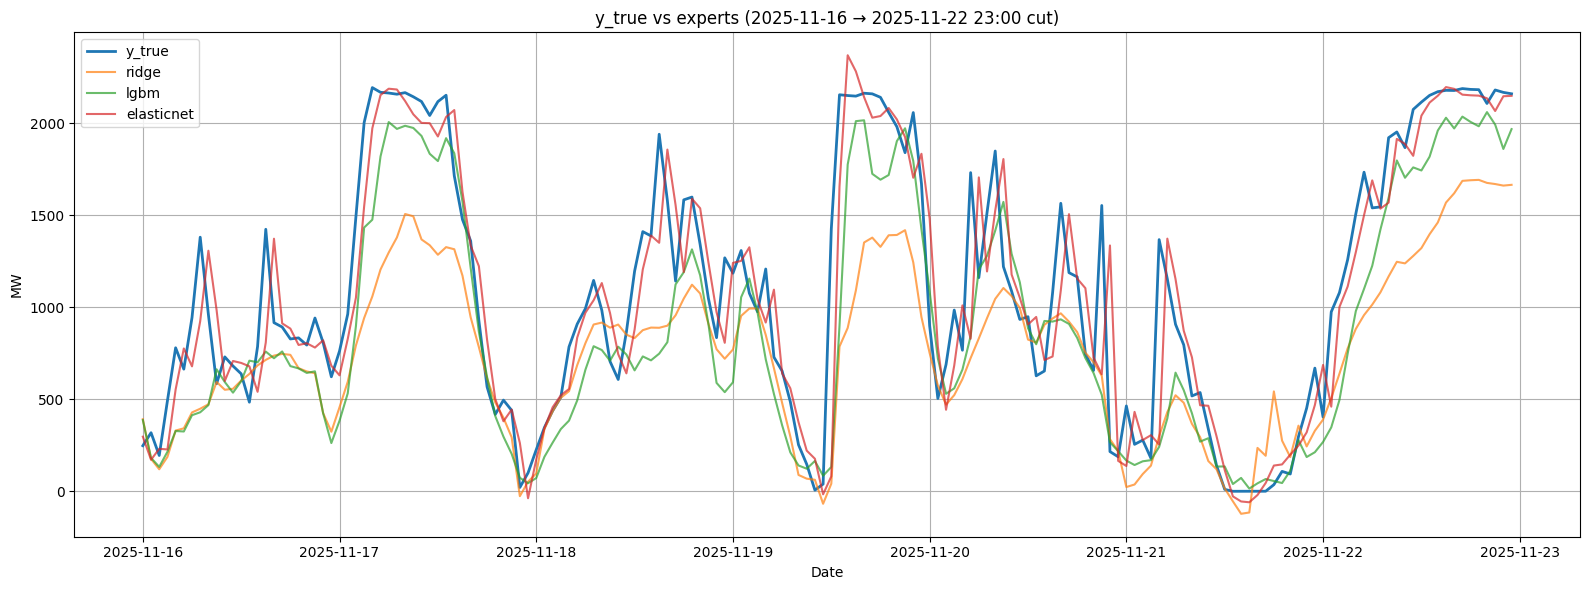

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- load ---
df = pd.read_csv("data/output1/experts.csv")
df["Date_Heure"] = pd.to_datetime(df["Date_Heure"])

cols = ["y_true", "ridge", "lgbm", "elasticnet"]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = (
    df.dropna(subset=cols)
      .sort_values("Date_Heure")
)

# --- window: 2025-11-16 -> cut (last observed in experts.csv is 2025-11-22 23:00) ---
start = pd.Timestamp("2025-11-16 00:00:00")
cut   = pd.Timestamp("2025-11-22 23:00:00")   # la cut = fin de train (juste avant la préd 24h)

dfw = df[(df["Date_Heure"] >= start) & (df["Date_Heure"] <= cut)].copy()

# --- plot (NO aggregator) ---
plt.figure(figsize=(16,6))
plt.plot(dfw["Date_Heure"], dfw["y_true"], label="y_true", linewidth=2)
plt.plot(dfw["Date_Heure"], dfw["ridge"], label="ridge", alpha=0.7)
plt.plot(dfw["Date_Heure"], dfw["lgbm"], label="lgbm", alpha=0.7)
plt.plot(dfw["Date_Heure"], dfw["elasticnet"], label="elasticnet", alpha=0.7)

plt.title("y_true vs experts (2025-11-16 → 2025-11-22 23:00 cut)")
plt.xlabel("Date")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


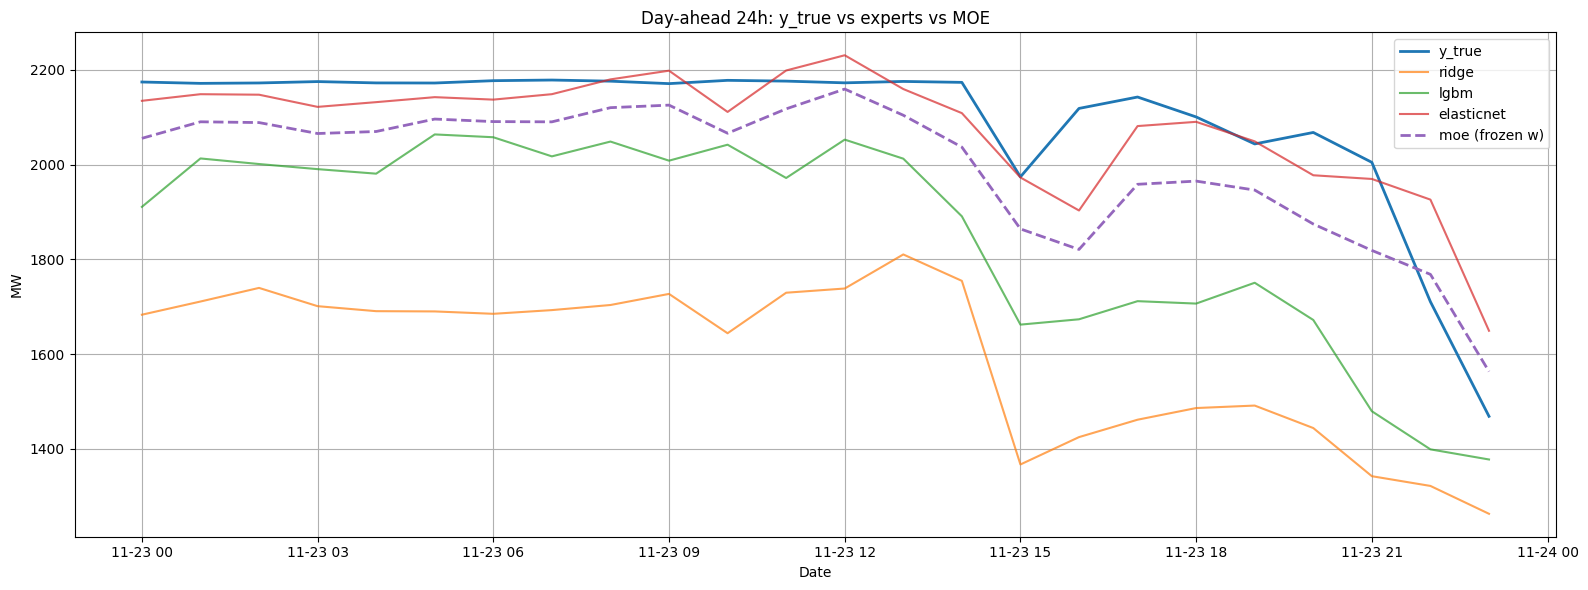

In [24]:
df_train = df.copy()  # du chunk précédent

# weights appris sur l'historique
w = mod.w.copy()

# load 24h block
df_24 = pd.read_csv("data/output2/pred_24h.csv")
df_24["Date_Heure"] = pd.to_datetime(df_24["Date_Heure"])
for c in cols:
    df_24[c] = pd.to_numeric(df_24[c], errors="coerce")
df_24 = df_24.dropna(subset=cols).sort_values("Date_Heure")

X_24 = df_24[["ridge", "lgbm", "elasticnet"]].to_numpy()
df_24["moe"] = (X_24 @ w).reshape(-1)   # poids figés

plt.figure(figsize=(16,6))
plt.plot(df_24["Date_Heure"], df_24["y_true"], label="y_true", linewidth=2)
plt.plot(df_24["Date_Heure"], df_24["ridge"], label="ridge", alpha=0.7)
plt.plot(df_24["Date_Heure"], df_24["lgbm"], label="lgbm", alpha=0.7)
plt.plot(df_24["Date_Heure"], df_24["elasticnet"], label="elasticnet", alpha=0.7)
plt.plot(df_24["Date_Heure"], df_24["moe"], label="moe (frozen w)", linewidth=2, linestyle="--")

plt.title("Day-ahead 24h: y_true vs experts vs MOE")
plt.xlabel("Date")
plt.ylabel("MW")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


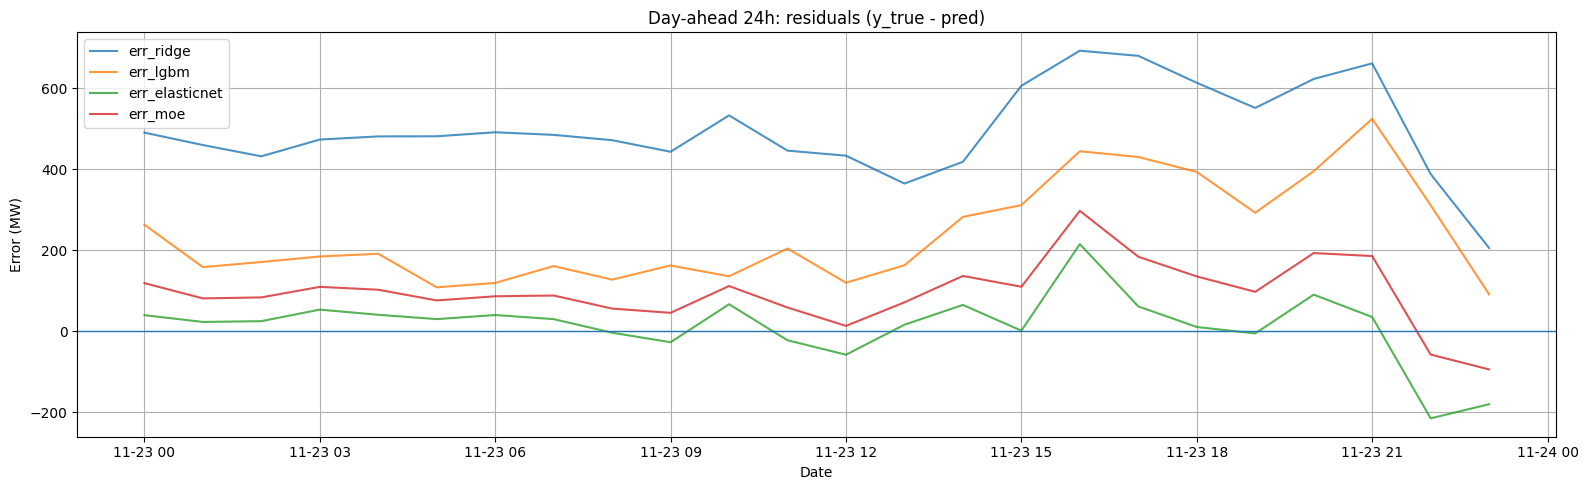

In [25]:
plt.figure(figsize=(16,5))
for name in ["ridge","lgbm","elasticnet","moe"]:
    plt.plot(df_24["Date_Heure"], df_24["y_true"] - df_24[name], label=f"err_{name}", alpha=0.8)

plt.axhline(0, linewidth=1)
plt.title("Day-ahead 24h: residuals (y_true - pred)")
plt.xlabel("Date")
plt.ylabel("Error (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
